In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_df = pd.read_csv("Resources/city_data.csv")
ride_df = pd.read_csv("Resources/ride_data.csv")
# Read the City and Ride Data
#city_df.head()
# Combine the data into a single dataset
cityride_df = city_df.merge(ride_df)
# Display the data table for preview
cityride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
 cityride_df["type"].value_counts()

Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64

## Bubble Plot of Ride Sharing Data

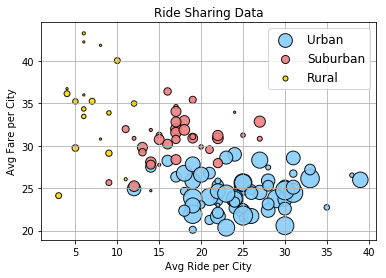

In [33]:
# Obtain the x and y coordinates for each of the three city types


urban_df = cityride_df[cityride_df["type"]=="Urban"]
suburban_df = cityride_df[cityride_df["type"]=="Suburban"]
rural_df = cityride_df[cityride_df["type"]=="Rural"]

#urban
urban_x = urban_df.groupby(["city"]).count()["ride_id"]
urban_y = urban_df.groupby(["city"]).mean()["fare"]
urban_s = urban_df.groupby(["city"]).mean()["driver_count"]

#suburban
suburban_x = suburban_df.groupby(["city"]).count()["ride_id"]
suburban_y = suburban_df.groupby(["city"]).mean()["fare"]
suburban_s = suburban_df.groupby(["city"]).mean()["driver_count"]

#rural
rural_x = rural_df.groupby(["city"]).count()["ride_id"]
rural_y = rural_df.groupby(["city"]).mean()["fare"]
rural_s = rural_df.groupby(["city"]).mean()["driver_count"]

# Build the scatter plots for each city type
plt.scatter(x = urban_x,
            y = urban_y,
            s = urban_s*5,
            alpha = .9,
            edgecolor = "black",
            c = "lightskyblue",
            label = "Urban")
plt.scatter(x = suburban_x,
            y = suburban_y,
            s = suburban_s*5,
            alpha = .9,
            edgecolor = "black",
            c = "lightcoral",
            label = "Suburban" )
plt.scatter(x = rural_x,
            y = rural_y,
            s = rural_s*5,
            alpha = .9,
            edgecolor = "black",
            c = "gold",
            label = "Rural")

# Incorporate the other graph properties
plt.title("Ride Sharing Data")
plt.xlabel("Avg Ride per City")
plt.ylabel("Avg Fare per City")
plt.grid(True)

# Create a legend
plt.legend(loc="best",fontsize="large")


# Incorporate a text label regarding circle size

#Save Figure
plt.savefig("plots/bubbleplot.png")

## Total Fares by City Type

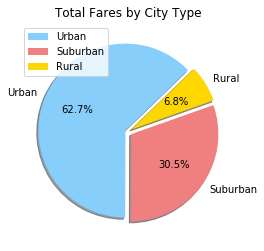

In [4]:
urbanfare = cityride_df["fare"][cityride_df["type"] == "Urban"].sum()
subfare = cityride_df["fare"][cityride_df["type"] == "Suburban"].sum()
ruralfare = cityride_df["fare"][cityride_df["type"] == "Rural"].sum()

wedges = [urbanfare,subfare,ruralfare]
colors = ["lightskyblue","lightcoral","gold"]
labels = ["Urban","Suburban","Rural"]
explode = [0.03,0.05,0.05]

plt.pie(wedges,
        labels = labels,
        colors = colors,
        autopct = '%1.1f%%',
       explode = explode,
       shadow = True,
       startangle = 44)
plt.title("Total Fares by City Type")
plt.legend(loc="best")

## Total Rides by City Type

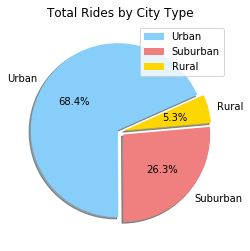

In [5]:
colors = ["lightskyblue","lightcoral","gold"]
labels = ["Urban","Suburban","Rural"]
explode = [0.03,0.05,0.05]

plt.pie(cityride_df["type"].value_counts(),
        labels = labels,
        colors = colors,
        autopct = '%1.1f%%',
       explode = explode,
       shadow = True,
       startangle = 24)
plt.title("Total Rides by City Type")
plt.legend(loc="best")

## Total Drivers by City Type

In [6]:
cityname = cityride_df.groupby(["city","type"]).mean()
cityname = cityname.reset_index()
cityname.head()

,city,type,driver_count,fare,ride_id
0,Amandaburgh,Urban,12.0,24.641667,5.359336e+12
1,Barajasview,Urban,26.0,25.332273,4.676968e+12
2,Barronchester,Suburban,11.0,36.422500,4.460796e+12
3,Bethanyland,Suburban,22.0,32.956111,5.842550e+12
4,Bradshawfurt,Rural,7.0,40.064000,3.735294e+12


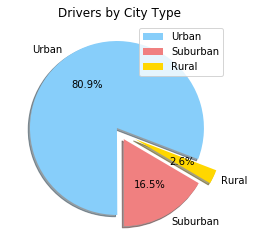

In [7]:
urbandriver = cityname["driver_count"][cityname["type"] == "Urban"].sum()
subdriver = cityname["driver_count"][cityname["type"] == "Suburban"].sum()
ruraldriver = cityname["driver_count"][cityname["type"] == "Rural"].sum()

wedges = [urbandriver,subdriver,ruraldriver]
colors = ["lightskyblue","lightcoral","gold"]
labels = ["Urban","Suburban","Rural"]
explode = [0.05,0.1,0.2]

plt.pie(wedges,
        labels = labels,
        colors = colors,
        autopct = '%1.1f%%',
       explode = explode,
       shadow = True,
       startangle = 339)
plt.title("Drivers by City Type")
plt.legend(loc="best")